In [137]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

In [138]:
DIR='C:/Users/Manohar Vemuri/Desktop/M/project/CT_SCAN'
CATEGORIES=["Normal","Kidney_stone"]

In [139]:
training_data=[]

def train_data():
    for categories in CATEGORIES:
        path=os.path.join(DIR,categories)
        class_num=CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(128,128))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
train_data()

In [140]:
import random
random.shuffle(training_data)

In [141]:
# NORMAL = 0

0


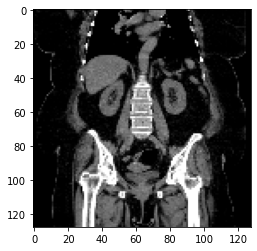

In [142]:
plt.imshow(training_data[2][0],cmap='gray')
print(training_data[2][1])

In [143]:
# KIDNEY_STONE = 1

In [144]:
X=[]
y=[]

In [145]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)
#X=np.array(X).reshape(-1,128*128)
X=np.array(X)
y=np.array(y)

In [146]:
X.shape

(1609, 128, 128, 3)

In [147]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1,random_state=1)

In [148]:
print(len(Xtrain),len(Xtest),len(ytrain),len(ytest))

1448 161 1448 161


In [149]:
Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)

#Xtrain=Xtrain.astype('float32')
#Xtest=Xtest.astype('float32')

#Xtrain=Xtrain/255
#Xtest=Xtest/255

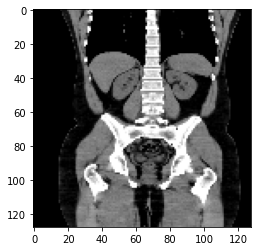

In [14]:
plt.imshow(Xtrain[6],cmap='gray')

In [409]:
print(ytrain[6])

1


In [116]:
def median_blur(img):
    #res = cv2.cvtColor(median_blur, cv2.COLOR_BGR2GRAY)
    mb = cv2.medianBlur(img, 1)
    res=hist(mb)
    return res
    
def hist(img):
    res = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gamma_corrected = np.array(255*(res / 255) ** 2.5, dtype = 'uint8')
    thres=thresholding_img(gamma_corrected)
    return thres

def thresholding_img(img):
    ret, thresh1 = cv2.threshold(img, 250,255, cv2.THRESH_BINARY)
    return thresh1

processed_img=[]
for img in Xtrain:
    res=median_blur(img)
    processed_img.append(res)
    
processed_img=np.array(processed_img)

In [117]:
ytrain[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

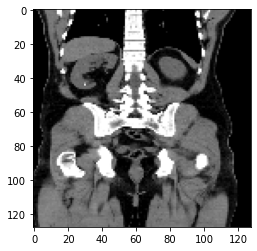

In [118]:
plt.imshow(Xtrain[3],cmap='gray')

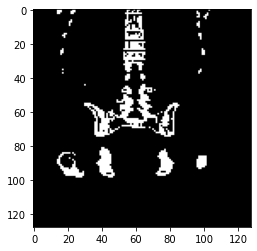

In [119]:
plt.imshow(processed_img[3],cmap='gray')

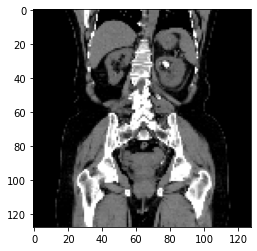

In [414]:
plt.imshow(Xtrain[9],cmap='gray')

In [126]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Flatten, Convolution2D, Activation, Dropout, MaxPooling2D

In [625]:
model=Sequential()
model.add(Convolution2D(128, 3, 3, input_shape=(128, 128, 1)))
model.add(Activation('relu'))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [626]:
model.fit(processed_img, ytrain, epochs=25, batch_size=100)

Epoch 1/25
15/15 [==============================] - 3s 180ms/step - loss: 16.5575 - accuracy: 0.5110
Epoch 2/25
15/15 [==============================] - 3s 180ms/step - loss: 0.8331 - accuracy: 0.5815
Epoch 3/25
15/15 [==============================] - 3s 180ms/step - loss: 0.6454 - accuracy: 0.6492
Epoch 4/25
15/15 [==============================] - 3s 184ms/step - loss: 0.6480 - accuracy: 0.6664
Epoch 5/25
15/15 [==============================] - 3s 181ms/step - loss: 0.5882 - accuracy: 0.7113
Epoch 6/25
15/15 [==============================] - 3s 179ms/step - loss: 0.5115 - accuracy: 0.7548
Epoch 7/25
15/15 [==============================] - 3s 180ms/step - loss: 0.4190 - accuracy: 0.8080
Epoch 8/25
15/15 [==============================] - 3s 182ms/step - loss: 0.3677 - accuracy: 0.8398
Epoch 9/25
15/15 [==============================] - 3s 186ms/step - loss: 0.4388 - accuracy: 0.8273
Epoch 10/25
15/15 [==============================] - 3s 182ms/step - loss: 0.1930 - accuracy: 0.922

In [627]:
Xtest_processed_img=[]
for img in Xtest:
    res=median_blur(img)
    Xtest_processed_img.append(res)
Xtest_processed_img=np.array(Xtest_processed_img)

In [628]:
ypred=model.predict(Xtest_processed_img)

In [629]:
from sklearn.metrics import confusion_matrix
cc=confusion_matrix(ytest,(ypred>0.75)*1)
cc

array([[64, 27],
       [21, 49]], dtype=int64)

In [636]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest,(ypred>0.75)*1)
score*100

70.1863354037267

In [647]:
def build_model(hp):
    model=keras.Sequential([
        keras.layers.Convolution2D(
            filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
            activation='relu',
            input_shape=(128, 128, 1)
        ),
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter',min_value=32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
            activation='relu'
        ),
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
            activation='relu'
        ),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1,activation='sigmoid')
    ]
    )
    
    
    model.compile(optimizer=keras.optimizers.RMSprop(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [648]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [649]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [650]:
tuner_search.search(processed_img,ytrain,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 51s]
val_accuracy: 0.5724138021469116

Best val_accuracy So Far: 0.7586206793785095
Total elapsed time: 00h 03m 55s
INFO:tensorflow:Oracle triggered exit


In [651]:
model=tuner_search.get_best_models(num_models=1)[0]

In [652]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 48)        76848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 48)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6912)              0         
                                                                 
 dense (Dense)               (None, 64)                4

In [653]:
model.fit(processed_img, ytrain, epochs=30, batch_size=100,verbose=1)

Epoch 1/30
15/15 [==============================] - 18s 1s/step - loss: 0.3673 - accuracy: 0.8405
Epoch 2/30
15/15 [==============================] - 20s 1s/step - loss: 0.3088 - accuracy: 0.8681
Epoch 3/30
15/15 [==============================] - 18s 1s/step - loss: 0.2567 - accuracy: 0.8999
Epoch 4/30
15/15 [==============================] - 19s 1s/step - loss: 0.2343 - accuracy: 0.9047
Epoch 5/30
15/15 [==============================] - 22s 1s/step - loss: 0.2174 - accuracy: 0.9192
Epoch 6/30
15/15 [==============================] - 22s 1s/step - loss: 0.1219 - accuracy: 0.9523
Epoch 7/30
15/15 [==============================] - 22s 1s/step - loss: 0.1119 - accuracy: 0.9530
Epoch 8/30
15/15 [==============================] - 22s 1s/step - loss: 0.0890 - accuracy: 0.9662
Epoch 9/30
15/15 [==============================] - 22s 1s/step - loss: 0.0786 - accuracy: 0.9703
Epoch 10/30
15/15 [==============================] - 23s 2s/step - loss: 0.0856 - accuracy: 0.9717
Epoch 11/30
15/15 [

In [150]:
model = keras.models.load_model('C:/Users/Manohar Vemuri/Desktop/M/project')

In [151]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 112)       179312    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 112)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16128)             0         
                                                                 
 dense (Dense)               (None, 80)                1

In [152]:
Xtest_processed_img=[]
for img in Xtest:
    res=median_blur(img)
    Xtest_processed_img.append(res)
    
Xtest_processed_img=np.array(Xtest_processed_img)

In [153]:
ypred=model.predict(Xtest_processed_img)

In [154]:
from sklearn.metrics import confusion_matrix
cc=confusion_matrix(ytest,(ypred>0.75)*1)
cc

array([[47, 40],
       [10, 64]], dtype=int64)

In [155]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest,(ypred>0.75)*1)
score*100

68.94409937888199

In [394]:
img_array=cv2.imread('test.png')
new_array=cv2.resize(img_array,(128,128))

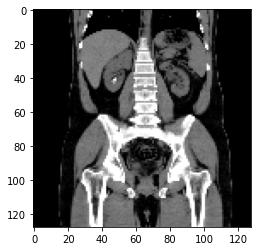

In [395]:
plt.imshow(new_array,cmap='gray')
res=median_blur(new_array)

In [388]:
res=res.reshape(-1,128,128,1)
ypred=model.predict(res)

In [391]:
(ypred>0.5)*1

array([[1]])